<a href="https://colab.research.google.com/github/ArjunSNair00/DataScience_Project/blob/main/job_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align:center;font-size:50px;background:linear-gradient(to right, #27D3F5, #F527D3);-webkit-background-clip:text;color:transparent;">AI/Data Job Recommendation System</h1>


<h1 align="center">Importing Libraries And Dataset</h1>

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [164]:
url="https://raw.githubusercontent.com/ArjunSNair00/DataScience_Project/main/jobs_dataset.csv"
jobs=pd.read_csv(url)
original_jobs=jobs

<h1 align="center">Data overview</h1>

In [165]:
jobs

,company,rating,location,positionName,description,salary,url,jobType/0,jobType/1,jobType/2,jobType/3,searchInput/country,searchInput/position,externalApplyLink
0,Google,4.3,"San Bruno, CA","Senior Data Scientist, Research, YouTube Search",Note: By applying to this position you will ha...,"$166,000 - $244,000 a year",https://www.indeed.com/viewjob?jk=3129ec5dde24...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.google.com/about/careers/applicati...
1,BAXTER,3.7,"Milwaukee, WI 53214",Senior AI Engineer - Data Scientist,This is where you save and sustain lives\n\nAt...,"$112,000 - $154,000 a year",https://www.indeed.com/viewjob?jk=19da1b85455c...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://jobs.baxter.com/en/job/-/-/152/8298788...
2,Meta,4.2,"Redmond, WA","Audio Software Engineer, Applied Scientist","Redmond, WA • + 2 more•Full Time\nMessenger\nM...",$70.67 an hour,https://www.indeed.com/viewjob?jk=0b0b432e2a51...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.metacareers.com/jobs/3101204833367...
3,Meta,4.2,"Bellevue, WA 98005","Software Engineer, Machine Learning","Bellevue, WA • Full Time\nMeta\nSoftware Engin...","$203,350 - $240,240 a year",https://www.indeed.com/viewjob?jk=08d2ef77c976...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.metacareers.com/jobs/1096352489054...
4,Lockheed Martin,4.0,"Shelton, CT 06484",AI / Machine Learning Research Engineer (early...,"Job ID: 694362BR\nDate posted: May. 22, 2025\n...",NaN,https://www.indeed.com/viewjob?jk=e9aad7dcc34e...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://click.appcast.io/t/V35efAz0-l7FWwo6IKe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,Citi,3.9,"Tampa, FL 33601",VP - Regulatory Reporting Ld Analyst / Data Sc...,The Global Regulatory and Capital Reporting – ...,"$103,920 - $155,880 a year",https://www.indeed.com/viewjob?jk=1788a159e9e1...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://jobs.citi.com/job/-/-/287/82223642464?...
731,Vanguard,3.6,"Malvern, PA","Machine Learning Engineer, Specialist",Performs the development and programming of ma...,NaN,https://www.indeed.com/viewjob?jk=3bf31ffadc90...,NaN,NaN,NaN,NaN,US,Data Scientist,https://www.vanguardjobs.com/job/22059474/mach...
732,Vanguard,3.6,"Charlotte, NC","Domain Architect- AI/ML, Senior Specialist",Drives the implementation of Artificial Intell...,NaN,https://www.indeed.com/viewjob?jk=b26b2fdaa44c...,NaN,NaN,NaN,NaN,US,Data Scientist,https://www.vanguardjobs.com/job/22004413/doma...
733,Guidehouse,3.3,"Huntsville, AL 35806",Data Analytics Consultant,Job Family:\n\nData Science Consulting\n\nTrav...,NaN,https://www.indeed.com/viewjob?jk=ba05cd000d5b...,NaN,NaN,NaN,NaN,US,Data Scientist,https://guidehouse.searchgreatcareers.com/job/...


In [166]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company               735 non-null    object 
 1   rating                735 non-null    float64
 2   location              735 non-null    object 
 3   positionName          735 non-null    object 
 4   description           735 non-null    object 
 5   salary                506 non-null    object 
 6   url                   735 non-null    object 
 7   jobType/0             501 non-null    object 
 8   jobType/1             19 non-null     object 
 9   jobType/2             1 non-null      object 
 10  jobType/3             1 non-null      object 
 11  searchInput/country   735 non-null    object 
 12  searchInput/position  735 non-null    object 
 13  externalApplyLink     553 non-null    object 
dtypes: float64(1), object(13)
memory usage: 80.5+ KB


In [167]:
print(jobs['jobType/0'].unique())

['Full-time' nan 'Part-time' 'Contract' 'Temporary' 'Internship'
 'Permanent']


In [168]:
jobs['searchInput/country'].value_counts()

searchInput/country
US    735
Name: count, dtype: int64

In [169]:
print(jobs['jobType/0'].value_counts(),end='\n\n')
print(jobs['searchInput/position'].value_counts())

jobType/0
Full-time     439
Contract       42
Part-time      10
Temporary       5
Internship      4
Permanent       1
Name: count, dtype: int64

searchInput/position
Data Scientist    735
Name: count, dtype: int64


<h1 align="center">Data Cleaning</h1>

In [170]:
jobs_clean = jobs.drop(['url','jobType/0','jobType/1','jobType/2','jobType/3','externalApplyLink','searchInput/country','searchInput/position'], axis=1)
jobs_clean

,company,rating,location,positionName,description,salary
0,Google,4.3,"San Bruno, CA","Senior Data Scientist, Research, YouTube Search",Note: By applying to this position you will ha...,"$166,000 - $244,000 a year"
1,BAXTER,3.7,"Milwaukee, WI 53214",Senior AI Engineer - Data Scientist,This is where you save and sustain lives\n\nAt...,"$112,000 - $154,000 a year"
2,Meta,4.2,"Redmond, WA","Audio Software Engineer, Applied Scientist","Redmond, WA • + 2 more•Full Time\nMessenger\nM...",$70.67 an hour
3,Meta,4.2,"Bellevue, WA 98005","Software Engineer, Machine Learning","Bellevue, WA • Full Time\nMeta\nSoftware Engin...","$203,350 - $240,240 a year"
4,Lockheed Martin,4.0,"Shelton, CT 06484",AI / Machine Learning Research Engineer (early...,"Job ID: 694362BR\nDate posted: May. 22, 2025\n...",NaN
...,...,...,...,...,...,...
730,Citi,3.9,"Tampa, FL 33601",VP - Regulatory Reporting Ld Analyst / Data Sc...,The Global Regulatory and Capital Reporting – ...,"$103,920 - $155,880 a year"
731,Vanguard,3.6,"Malvern, PA","Machine Learning Engineer, Specialist",Performs the development and programming of ma...,NaN
732,Vanguard,3.6,"Charlotte, NC","Domain Architect- AI/ML, Senior Specialist",Drives the implementation of Artificial Intell...,NaN
733,Guidehouse,3.3,"Huntsville, AL 35806",Data Analytics Consultant,Job Family:\n\nData Science Consulting\n\nTrav...,NaN


In [171]:
jobs_clean['salary'].value_counts()

salary
$206,000 - $281,000 a year          6
$166,000 - $244,000 a year          5
$118,200 - $204,300 a year          4
$129,300 - $223,600 a year          4
$136,000 - $223,400 a year          4
                                   ..
$135,803.23 - $175,483.45 a year    1
$74,000 - $135,000 a year           1
$157,000 - $230,000 a year          1
$90,000 - $182,000 a year           1
$104,645 - $162,000 a year          1
Name: count, Length: 385, dtype: int64

In [172]:
jobs_clean=jobs_clean[['company','rating','location','positionName','description','salary']]
jobs_clean

,company,rating,location,positionName,description,salary
0,Google,4.3,"San Bruno, CA","Senior Data Scientist, Research, YouTube Search",Note: By applying to this position you will ha...,"$166,000 - $244,000 a year"
1,BAXTER,3.7,"Milwaukee, WI 53214",Senior AI Engineer - Data Scientist,This is where you save and sustain lives\n\nAt...,"$112,000 - $154,000 a year"
2,Meta,4.2,"Redmond, WA","Audio Software Engineer, Applied Scientist","Redmond, WA • + 2 more•Full Time\nMessenger\nM...",$70.67 an hour
3,Meta,4.2,"Bellevue, WA 98005","Software Engineer, Machine Learning","Bellevue, WA • Full Time\nMeta\nSoftware Engin...","$203,350 - $240,240 a year"
4,Lockheed Martin,4.0,"Shelton, CT 06484",AI / Machine Learning Research Engineer (early...,"Job ID: 694362BR\nDate posted: May. 22, 2025\n...",NaN
...,...,...,...,...,...,...
730,Citi,3.9,"Tampa, FL 33601",VP - Regulatory Reporting Ld Analyst / Data Sc...,The Global Regulatory and Capital Reporting – ...,"$103,920 - $155,880 a year"
731,Vanguard,3.6,"Malvern, PA","Machine Learning Engineer, Specialist",Performs the development and programming of ma...,NaN
732,Vanguard,3.6,"Charlotte, NC","Domain Architect- AI/ML, Senior Specialist",Drives the implementation of Artificial Intell...,NaN
733,Guidehouse,3.3,"Huntsville, AL 35806",Data Analytics Consultant,Job Family:\n\nData Science Consulting\n\nTrav...,NaN


In [173]:
def parse_salary(s):
    if pd.isna(s):
        return pd.Series([False,False,np.nan,np.nan,np.nan],index=['hourly_salary','daily_salary','min_salary','max_salary','average_salary'])
    salary=s.replace('$','').replace(',','').lower().strip()
    hourly='hour' in salary
    daily='day' in salary
    salary=salary.replace('a year','').replace('an hour','').replace('a day','')
    for i in ["from","up to","starting at"]:
        salary=salary.replace(i, "")
    parts=salary.split('-')
    if len(parts)==2:
        min_salary=pd.to_numeric(parts[0].strip(),errors="coerce")
        max_salary=pd.to_numeric(parts[1].strip(),errors="coerce")
    else:
        min_salary=pd.to_numeric(parts[0].strip(),errors="coerce")
        max_salary=min_salary
    if pd.isna(min_salary) or pd.isna(max_salary):
        return pd.Series([hourly,daily,np.nan,np.nan,np.nan],index=['hourly_salary','daily_salary','min_salary','max_salary','average_salary'])
    average_salary=(min_salary+max_salary)/2

    if hourly:
        n=40*52
    elif daily:
        n=5*52
    else:
        n=1
    min_salary*=n
    max_salary*=n
    average_salary*=n

    return pd.Series([hourly,daily,min_salary,max_salary,average_salary],
                     index=['hourly_salary','daily_salary','min_salary','max_salary','average_salary'])

jobs_clean[['hourly_salary','daily_salary','min_salary','max_salary','average_salary']]=(jobs_clean['salary'].apply(parse_salary)
)
jobs_clean

,company,rating,location,positionName,description,salary,hourly_salary,daily_salary,min_salary,max_salary,average_salary
0,Google,4.3,"San Bruno, CA","Senior Data Scientist, Research, YouTube Search",Note: By applying to this position you will ha...,"$166,000 - $244,000 a year",False,False,166000.0,244000.0,205000.0
1,BAXTER,3.7,"Milwaukee, WI 53214",Senior AI Engineer - Data Scientist,This is where you save and sustain lives\n\nAt...,"$112,000 - $154,000 a year",False,False,112000.0,154000.0,133000.0
2,Meta,4.2,"Redmond, WA","Audio Software Engineer, Applied Scientist","Redmond, WA • + 2 more•Full Time\nMessenger\nM...",$70.67 an hour,True,False,146993.6,146993.6,146993.6
3,Meta,4.2,"Bellevue, WA 98005","Software Engineer, Machine Learning","Bellevue, WA • Full Time\nMeta\nSoftware Engin...","$203,350 - $240,240 a year",False,False,203350.0,240240.0,221795.0
4,Lockheed Martin,4.0,"Shelton, CT 06484",AI / Machine Learning Research Engineer (early...,"Job ID: 694362BR\nDate posted: May. 22, 2025\n...",NaN,False,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
730,Citi,3.9,"Tampa, FL 33601",VP - Regulatory Reporting Ld Analyst / Data Sc...,The Global Regulatory and Capital Reporting – ...,"$103,920 - $155,880 a year",False,False,103920.0,155880.0,129900.0
731,Vanguard,3.6,"Malvern, PA","Machine Learning Engineer, Specialist",Performs the development and programming of ma...,NaN,False,False,NaN,NaN,NaN
732,Vanguard,3.6,"Charlotte, NC","Domain Architect- AI/ML, Senior Specialist",Drives the implementation of Artificial Intell...,NaN,False,False,NaN,NaN,NaN
733,Guidehouse,3.3,"Huntsville, AL 35806",Data Analytics Consultant,Job Family:\n\nData Science Consulting\n\nTrav...,NaN,False,False,NaN,NaN,NaN


In [174]:
jobs_clean['average_salary'].describe()

count       502.000000
mean     170108.226673
std       53178.643183
min       58240.000000
25%      133080.625000
50%      169265.000000
75%      202305.000000
max      445000.000000
Name: average_salary, dtype: float64

In [175]:
jobs_clean=jobs_clean.drop(['salary','hourly_salary','daily_salary'],axis=1)
jobs_clean

,company,rating,location,positionName,description,min_salary,max_salary,average_salary
0,Google,4.3,"San Bruno, CA","Senior Data Scientist, Research, YouTube Search",Note: By applying to this position you will ha...,166000.0,244000.0,205000.0
1,BAXTER,3.7,"Milwaukee, WI 53214",Senior AI Engineer - Data Scientist,This is where you save and sustain lives\n\nAt...,112000.0,154000.0,133000.0
2,Meta,4.2,"Redmond, WA","Audio Software Engineer, Applied Scientist","Redmond, WA • + 2 more•Full Time\nMessenger\nM...",146993.6,146993.6,146993.6
3,Meta,4.2,"Bellevue, WA 98005","Software Engineer, Machine Learning","Bellevue, WA • Full Time\nMeta\nSoftware Engin...",203350.0,240240.0,221795.0
4,Lockheed Martin,4.0,"Shelton, CT 06484",AI / Machine Learning Research Engineer (early...,"Job ID: 694362BR\nDate posted: May. 22, 2025\n...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
730,Citi,3.9,"Tampa, FL 33601",VP - Regulatory Reporting Ld Analyst / Data Sc...,The Global Regulatory and Capital Reporting – ...,103920.0,155880.0,129900.0
731,Vanguard,3.6,"Malvern, PA","Machine Learning Engineer, Specialist",Performs the development and programming of ma...,NaN,NaN,NaN
732,Vanguard,3.6,"Charlotte, NC","Domain Architect- AI/ML, Senior Specialist",Drives the implementation of Artificial Intell...,NaN,NaN,NaN
733,Guidehouse,3.3,"Huntsville, AL 35806",Data Analytics Consultant,Job Family:\n\nData Science Consulting\n\nTrav...,NaN,NaN,NaN


<h1 align="center">Feature Engineering</h1>

In [176]:
skills_dict={
  0: "Programming Languages",
  1: "Math & Statistics",
  2: "Machine Learning & AI",
  3: "ML Frameworks & Libraries",
  4: "Big Data & Data Engineering",
  5: "Databases",
  6: "Cloud & DevOps",
  7: "Data Analysis & BI",
  8: "MLOps & Deployment",
  9: "Systems & HPC",
  10: "Other / Domain"
}

skill_categories = {
    0: [
        "python", "r", "java", "c", "c#", "c++", "go", "scala", "haskell", "typescript",
        "javascript", "react","php", "perl", "bash", "shell scripting", "shell scripts", "unix", "linux",
        "matlab", "swift", "kotlin"
    ],
    1: [
        "calculus", "linear algebra", "probability", "statistics", "hypothesis testing",
        "classification", "clustering", "regression", "time series analysis", "time series forecasting",
        "optimization", "graph theory", "stochastic simulation", "bayesian statistics", "multivariate statistics",
        "statistical modeling", "statistical inference", "experimental design"
    ],
    2: [
        "machine learning", "deep learning", "nlp", "natural language processing", "computer vision",
        "reinforcement learning", "recommendation systems", "anomaly detection", "generative ai",
        "self-supervised learning", "multi-task learning", "multi-modal ai/ml", "large language models",
        "llm", "rag", "prompt engineering", "ai/ml", "ai/ml development", "artificial intelligence",
        "ai engineering", "data science", "data mining", "predictive modeling", "image processing",
        "speech recognition", "NER"
    ],
    3: [
        "tensorflow", "pytorch", "keras", "mxnet", "scikit", "scipy", "numpy", "pandas",
        "matplotlib", "seaborn", "plotly", "streamlit", "gradio", "fastai", "hugging face",
        "transformers", "spacy", "nltk", "gensim", "statsmodels", "sympy", "xgboost",
        "lightgbm", "catboost", "opencv", "dlib", "torch"
    ],
    4: [
        "spark", "hadoop", "hive", "pig", "mapreduce", "kafka", "airflow", "databricks",
        "big data", "etl", "data pipelines", "data wrangling", "data infrastructure", "data engineering"
    ],
    5: [
        "sql", "mysql", "postgresql", "sqlite", "oracle", "mongodb", "cassandra",
        "redis", "dynamodb", "nosql", "bigtable", "hbase", "elasticsearch",
        "data warehousing", "data lakes", "data modeling"
    ],
    6: [
        "aws", "azure", "gcp", "sagemaker", "azure ml", "vertex ai", "gcp vertex ai",
        "docker", "kubernetes", "terraform", "ansible", "jenkins", "git", "gitlab", "github","ci/cd"
    ],
    7: [
        "excel", "sheets", "tableau", "power bi", "looker", "superset", "data visualization",
        "dash", "business intelligence", "data storytelling", "data reporting", "data dashboards"
    ],
    8: [
        "mlflow", "wandb", "dvc", "model deployment", "model monitoring",
        "model evaluation", "model validation", "llmops", "aops", "model interpretability",
        "explainable ai", "xai", "flask", "fastapi", "rest api", "grpc", "cloud functions", "serverless"
    ],
    9: [
        "hpc", "high performance computing", "high-performance computing",
        "parallel processing", "cuda", "intel oneapi", "nvidia tensorrt",
        "triton inference server", "onnxruntime", "distributed computing", "mpi",
        "ray", "dask", "embedded systems", "internet of things", "iot"
    ],
    10: [
        "economics", "sociology", "finance", "fraud detection", "compliance",
        "security", "cyber security", "hipaa", "data privacy", "data governance",
        "project management", "team leadership", "critical thinking", "communication skills",
        "physics", "audio signal processing", "signal processing", "computer graphics",
        "computational biology", "bioinformatics", "chemistry", "geospatial analysis",
        "geographic information systems (gis)", "operations research",
        "supply chain management", "marketing analytics", "sales analytics",
        "autocad", "solidworks", "3d modeling", "3d printing", "robotics",
        "blockchain", "quantum computing", "game development", "unity", "unreal engine",
        "mobile development"
    ]
}


In [177]:
def extract_skills_with_categories(text, skill_categories):
    text = text.lower()
    words = text.replace(",", " ").replace(".", " ").replace("(", " ").replace(")", " ").split()
    found_skills = []
    found_categories = []

    for cat_id, skills in skill_categories.items():
        for skill in skills:
            s = skill.lower()
            s_words = s.split()

            if len(s_words) == 1:
                if s in words:
                    found_skills.append(skill)
                    found_categories.append(cat_id)
            else:
                for i in range(len(words) - len(s_words) + 1):
                    if words[i:i+len(s_words)] == s_words:
                        found_skills.append(skill)
                        found_categories.append(cat_id)
                        break

    return [found_skills, found_categories]





def count_skills(result):
    c0=c1=c2=c3=c4=c5=c6=c7=c8=c9=c10=0
    for i in result[1]:
        if i==0:
            c0+=1
        elif i==1:
            c1+=1
        elif i==2:
            c2+=1
        elif i==3:
            c3+=1
        elif i==4:
            c4+=1
        elif i==5:
            c5+=1
        elif i==6:
            c6+=1
        elif i==7:
            c7+=1
        elif i==8:
            c8+=1
        elif i==9:
            c9+=1
        elif i==10:
            c10+=1
    return len(result[0]),[c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10]

In [178]:
# job_desc = "We need a python engineer with knowledge of linear algebra, perl, and tensorflow."
# job_desc= "i know some pandas and numpy"
# job_desc= "looking for someone skilled in python, R, sql, mchine learning, deep learning, nlp, computer vision, tensorflow, pytorch, aws, docker"
#job_desc= "looking for someone skilled in python, R, sql, mchine learning, deep learning, nlp, computer vision, tensorflow, pytorch, aws, docker"
#job_desc=jobs_clean['description'][600]


job_desc="""
Minimum qualifications:
Master's degree in Statistics, Data Science, Mathematics, Physics, Economics, Operations Research, Engineering, or a related quantitative field or equivalent practical experience.
5 years of experience using analytics to solve product or business problems, coding (e.g., Python, R, SQL), querying databases or statistical analysis, or 3 years of work experience with a PhD degree.
Preferred qualifications:
8 years of work experience using analytics to solve product or business problems, coding (e.g., Python, R, SQL), querying databases or statistical analysis, or 6 years of work experience with a PhD degree.
About the job
Own the process of gathering, extracting, and compiling data across sources via tools (e.g., SQL, R, Python). Format, re-structure, or validate data to ensure quality, and review the dataset to ensure it is ready for analysis.
Google is proud to be an equal opportunity workplace and is an affirmative action employer. We are committed to equal employment opportunity regardless of race, color, ancestry, religion, sex, national origin, sexual orientation, age, citizenship, marital status, disability, gender identity or Veteran status. We also consider qualified applicants regardless of criminal histories, consistent with legal requirements. See also Google's EEO Policy and EEO is the Law. If you have a disability or special need that requires accommodation, please let us know by completing our Accommodations for Applicants form."
"""
# print("Job Description:",job_desc,'\n\n')

def extract_skills(job_desc, skill_categories, skills_dict):
    result = extract_skills_with_categories(job_desc, skill_categories)
    count_all,count_single=count_skills(result)
    print(result[0],'\n',result[1], end='\n\n')
    for i in range(count_all):
        print(result[0][i], '-', skills_dict[result[1][i]])
    print("\n\nTotal Skills:",count_all,end='\n\n')
    for i in range(len(count_single)):
        print(skills_dict[i],":",count_single[i])

extract_skills(job_desc,skill_categories,skills_dict)

['python', 'r', 'statistics', 'data science', 'sql', 'economics', 'physics', 'operations research'] 
 [0, 0, 1, 2, 5, 10, 10, 10]

python - Programming Languages
r - Programming Languages
statistics - Math & Statistics
data science - Machine Learning & AI
sql - Databases
economics - Other / Domain
physics - Other / Domain
operations research - Other / Domain


Total Skills: 8

Programming Languages : 2
Math & Statistics : 1
Machine Learning & AI : 1
ML Frameworks & Libraries : 0
Big Data & Data Engineering : 0
Databases : 1
Cloud & DevOps : 0
Data Analysis & BI : 0
MLOps & Deployment : 0
Systems & HPC : 0
Other / Domain : 3


In [179]:
jobs_clean["skills_data"] = jobs_clean["description"].apply(
    lambda x: extract_skills_with_categories(str(x), skill_categories)
)

jobs_clean["skills"] = jobs_clean["skills_data"].apply(lambda x: x[0])
jobs_clean["skill_categories"] = jobs_clean["skills_data"].apply(lambda x: x[1])

jobs_clean["skills_count_all"] = jobs_clean["skills_data"].apply(lambda x: len(x[0]))
jobs_clean["skills_count_single"] = jobs_clean["skills_data"].apply(
    lambda x: count_skills(x)[1]
)

jobs_clean=jobs_clean.drop("skills_data", axis=1)
jobs_clean=jobs_clean.drop("description", axis=1)
# desc_col = jobs_clean.pop("description")
# jobs_clean.insert(7, "description", desc_col)
jobs_clean


,company,rating,location,positionName,min_salary,max_salary,average_salary,skills,skill_categories,skills_count_all,skills_count_single
0,Google,4.3,"San Bruno, CA","Senior Data Scientist, Research, YouTube Search",166000.0,244000.0,205000.0,"[python, r, statistics, data science, data inf...","[0, 0, 1, 2, 4, 5, 10, 10, 10]",9,"[2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 3]"
1,BAXTER,3.7,"Milwaukee, WI 53214",Senior AI Engineer - Data Scientist,112000.0,154000.0,133000.0,"[python, scala, optimization, machine learning...","[0, 0, 1, 2, 2, 2, 2, 4, 4, 6, 7, 7, 7, 10]",14,"[2, 1, 4, 0, 2, 0, 1, 3, 0, 0, 1]"
2,Meta,4.2,"Redmond, WA","Audio Software Engineer, Applied Scientist",146993.6,146993.6,146993.6,"[c, c++, machine learning, generative ai, arti...","[0, 0, 2, 2, 2, 10, 10, 10]",8,"[2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3]"
3,Meta,4.2,"Bellevue, WA 98005","Software Engineer, Machine Learning",203350.0,240240.0,221795.0,"[python, java, c, c#, c++, haskell, php, perl,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...",34,"[12, 3, 6, 3, 4, 3, 1, 0, 0, 0, 2]"
4,Lockheed Martin,4.0,"Shelton, CT 06484",AI / Machine Learning Research Engineer (early...,NaN,NaN,NaN,"[python, c, c++, go, linux, machine learning, ...","[0, 0, 0, 0, 0, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, ...",27,"[5, 0, 4, 5, 1, 0, 2, 0, 2, 6, 2]"
...,...,...,...,...,...,...,...,...,...,...,...
730,Citi,3.9,"Tampa, FL 33601",VP - Regulatory Reporting Ld Analyst / Data Sc...,103920.0,155880.0,129900.0,"[python, optimization, machine learning, gener...","[0, 1, 2, 2, 2, 5, 7, 10, 10, 10]",10,"[1, 1, 3, 0, 0, 1, 0, 1, 0, 0, 3]"
731,Vanguard,3.6,"Malvern, PA","Machine Learning Engineer, Specialist",NaN,NaN,NaN,"[python, statistics, machine learning, deep le...","[0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 5, 6, 6, ...",19,"[1, 1, 8, 0, 2, 1, 3, 0, 2, 0, 1]"
732,Vanguard,3.6,"Charlotte, NC","Domain Architect- AI/ML, Senior Specialist",NaN,NaN,NaN,"[regression, machine learning, ai/ml, artifici...","[1, 2, 2, 2, 6, 8, 10]",7,"[0, 1, 3, 0, 0, 0, 1, 0, 1, 0, 1]"
733,Guidehouse,3.3,"Huntsville, AL 35806",Data Analytics Consultant,NaN,NaN,NaN,"[python, r, ai/ml, data science, etl, data pip...","[0, 0, 2, 2, 4, 4, 4, 10]",8,"[2, 0, 2, 0, 3, 0, 0, 0, 0, 0, 1]"


<h1 align="center">Exploratory Data Analysis (EDA)<h1>

<h2 style="color:yellow; text-align:center;">Salary Analysis</h2>

C:\Users\aryan\AppData\Local\Temp\ipykernel_24976\2373762645.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=top_companies, patch_artist=True)


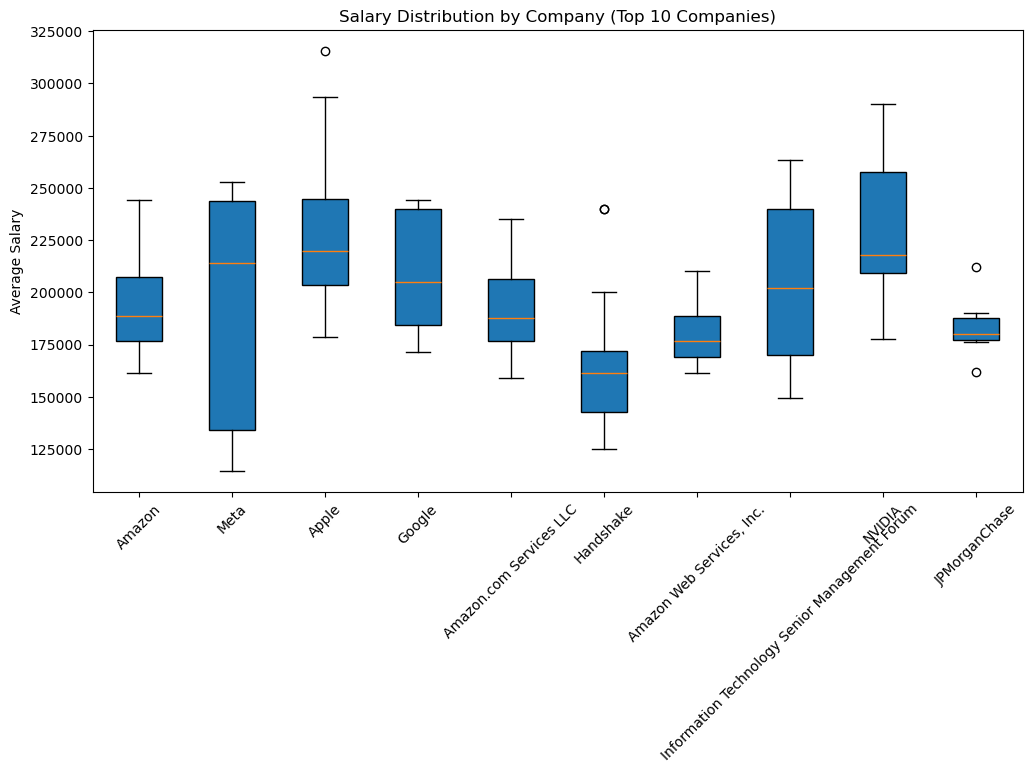

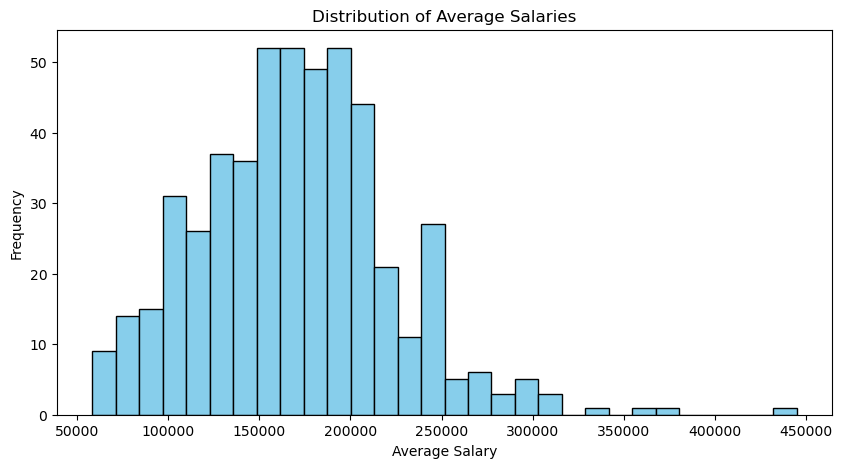

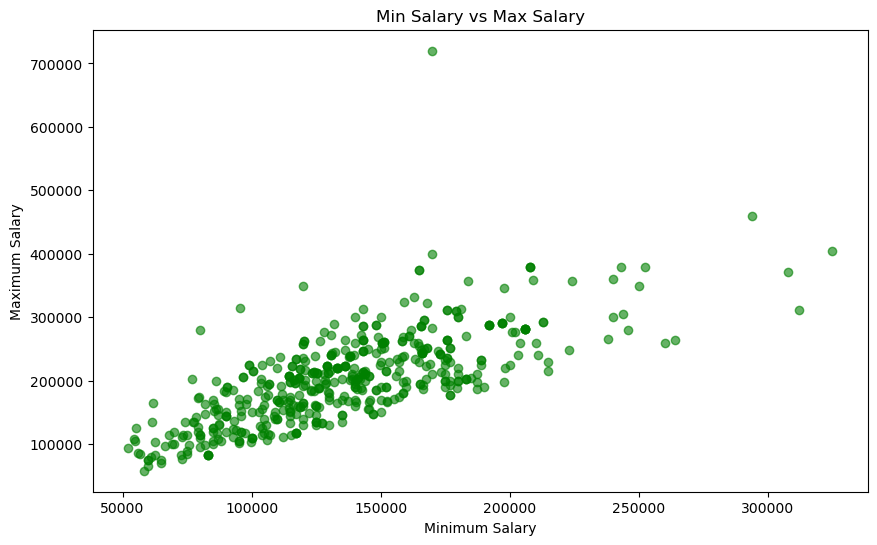

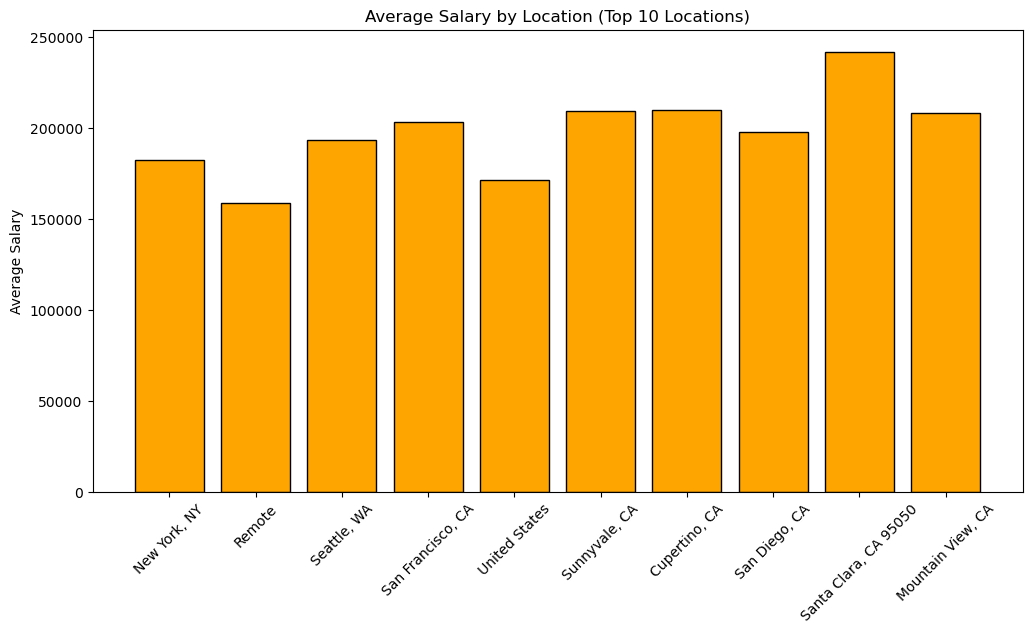

In [180]:
jobs_clean_salary = jobs_clean.dropna(subset=['average_salary'])

top_companies = jobs_clean_salary['company'].value_counts().head(10).index
data_to_plot = [jobs_clean_salary[jobs_clean_salary['company'] == company]['average_salary'] for company in top_companies]

plt.figure(figsize=(12,6))
plt.boxplot(data_to_plot, labels=top_companies, patch_artist=True)
plt.title('Salary Distribution by Company (Top 10 Companies)')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
plt.hist(jobs_clean_salary['average_salary'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Salaries')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(jobs_clean_salary['min_salary'], jobs_clean_salary['max_salary'], alpha=0.6, color='green')
plt.title('Min Salary vs Max Salary')
plt.xlabel('Minimum Salary')
plt.ylabel('Maximum Salary')
plt.show()

top_locations = jobs_clean_salary['location'].value_counts().head(10).index
avg_salaries = [jobs_clean_salary[jobs_clean_salary['location'] == loc]['average_salary'].mean() for loc in top_locations]

plt.figure(figsize=(12,6))
plt.bar(top_locations, avg_salaries, color='orange', edgecolor='black')
plt.title('Average Salary by Location (Top 10 Locations)')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()


<h2 style="color:yellow; text-align:center;">Skill and Market Trends Analysis</h2>

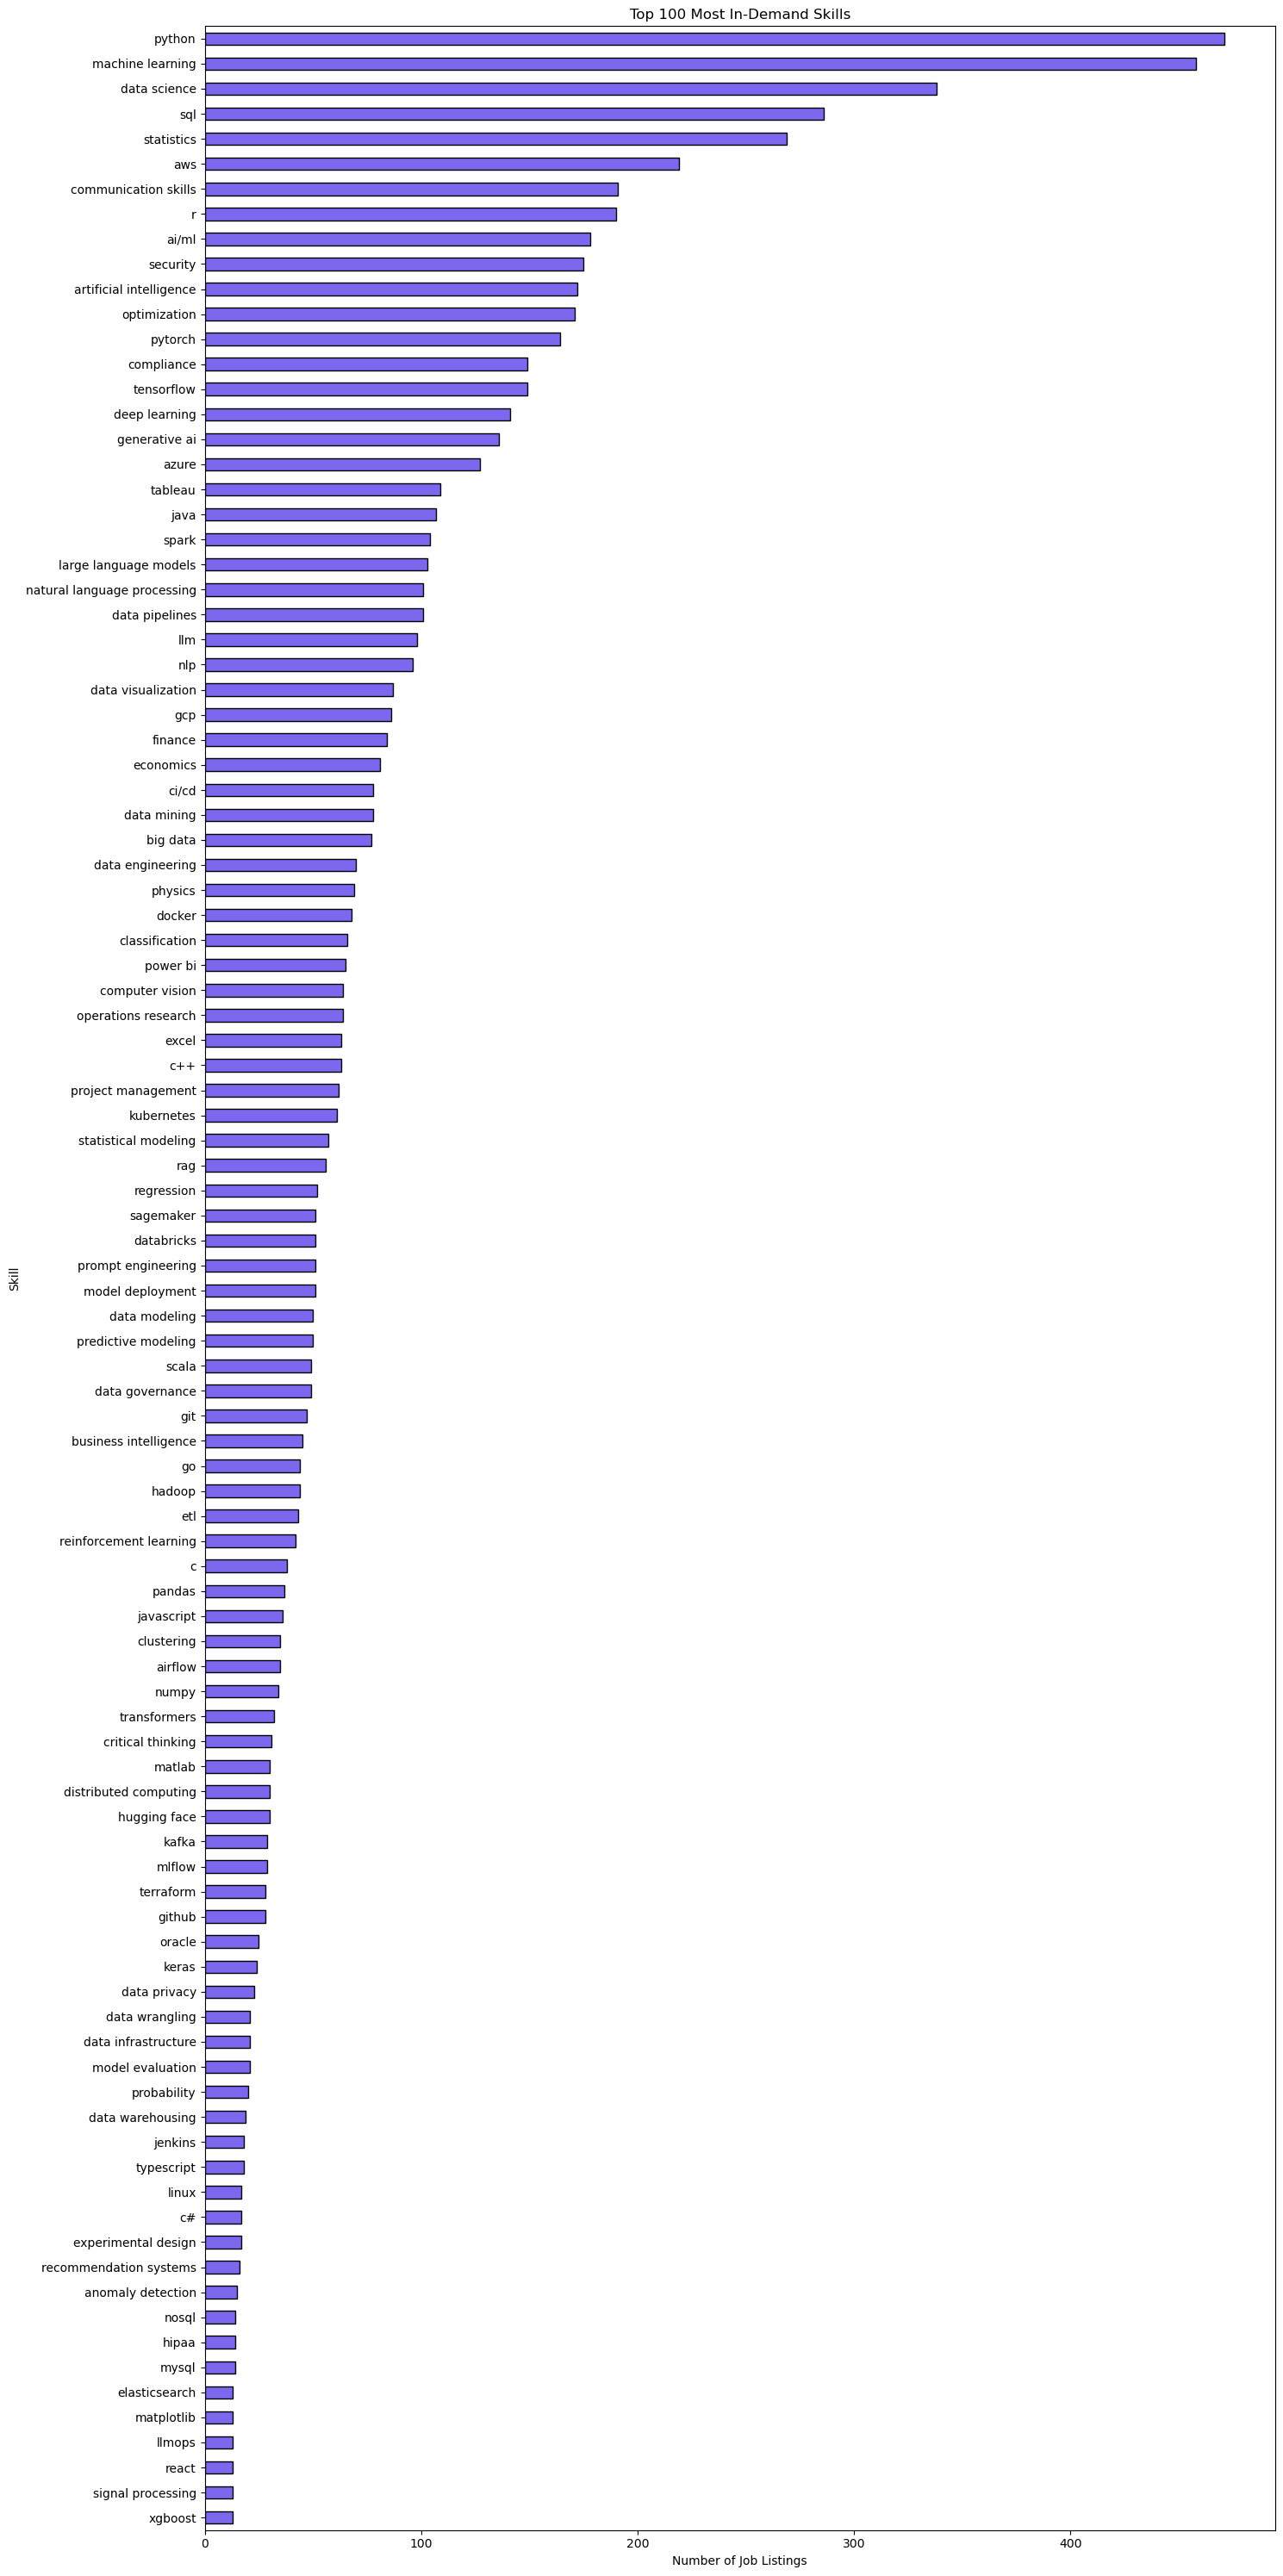

In [181]:
jobs_clean['skills'].explode().value_counts().head(100).sort_values().plot(kind='barh',figsize=(15,30),color='mediumslateblue',edgecolor='black',title='Top 100 Most In-Demand Skills')
plt.xlabel('Number of Job Listings')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()

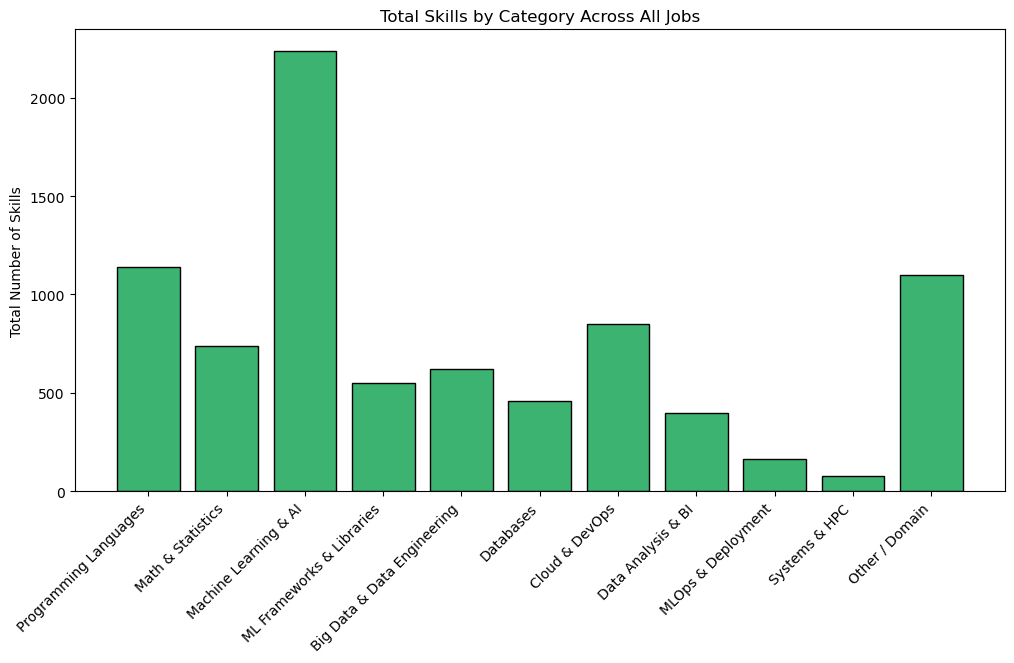

In [182]:
total_skills_by_category = np.zeros(11)

for skill_list in jobs_clean['skills_count_single']:
    for i, count in enumerate(skill_list):
        total_skills_by_category[i] += count

skills_dict = {
  0: "Programming Languages",
  1: "Math & Statistics",
  2: "Machine Learning & AI",
  3: "ML Frameworks & Libraries",
  4: "Big Data & Data Engineering",
  5: "Databases",
  6: "Cloud & DevOps",
  7: "Data Analysis & BI",
  8: "MLOps & Deployment",
  9: "Systems & HPC",
  10: "Other / Domain"
}

categories = [skills_dict[i] for i in range(11)]

plt.figure(figsize=(12,6))
plt.bar(categories, total_skills_by_category, color='mediumseagreen', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Number of Skills')
plt.title('Total Skills by Category Across All Jobs')
plt.show()


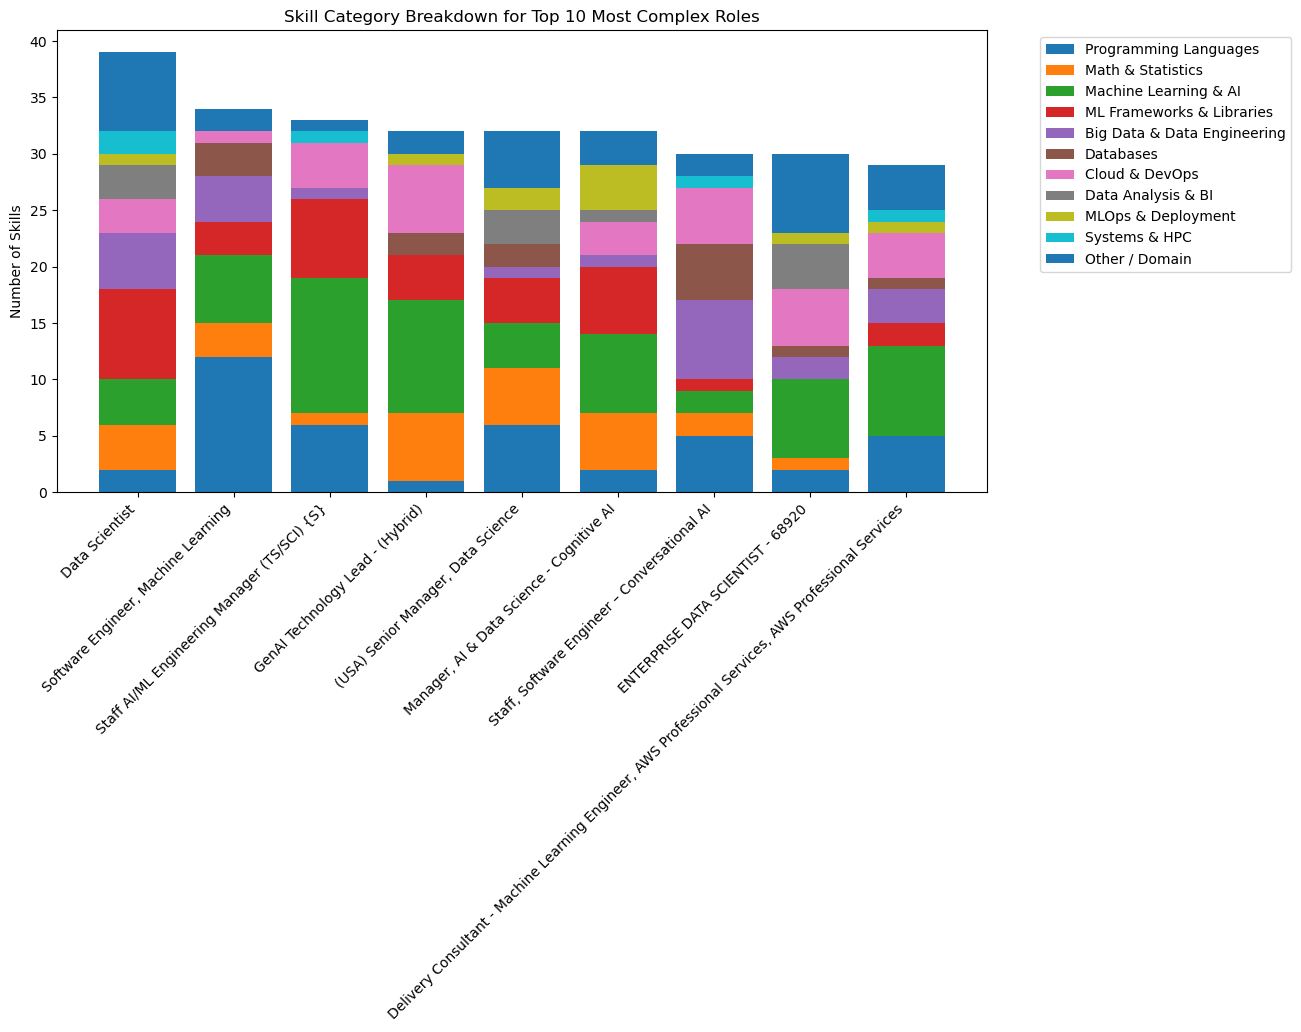

In [183]:
jobs_clean['total_skills'] = jobs_clean['skills_count_single'].apply(sum)
top_roles = jobs_clean.sort_values(by='total_skills', ascending=False).head(10)

stack_data = np.array(top_roles['skills_count_single'].tolist())
role_names = top_roles['positionName']

plt.figure(figsize=(12,6))
bottom = np.zeros(len(top_roles))

for i in range(11):
    plt.bar(role_names, stack_data[:, i], bottom=bottom, label=skills_dict[i])
    bottom += stack_data[:, i]

plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Skills')
plt.title('Skill Category Breakdown for Top 10 Most Complex Roles')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


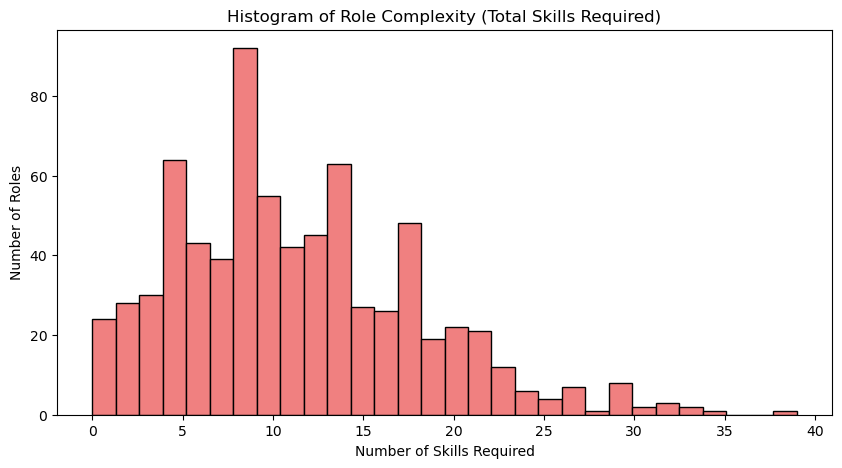

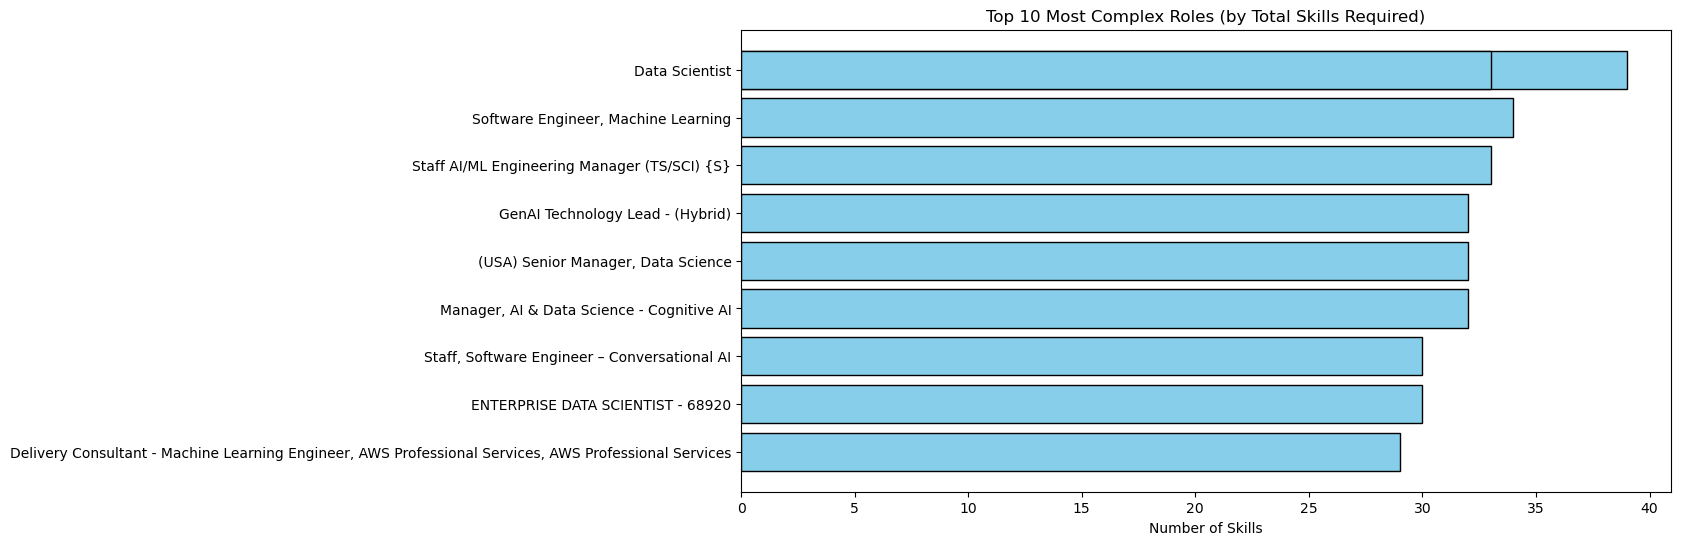

C:\Users\aryan\AppData\Local\Temp\ipykernel_24976\1594367553.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=top_companies, patch_artist=True)


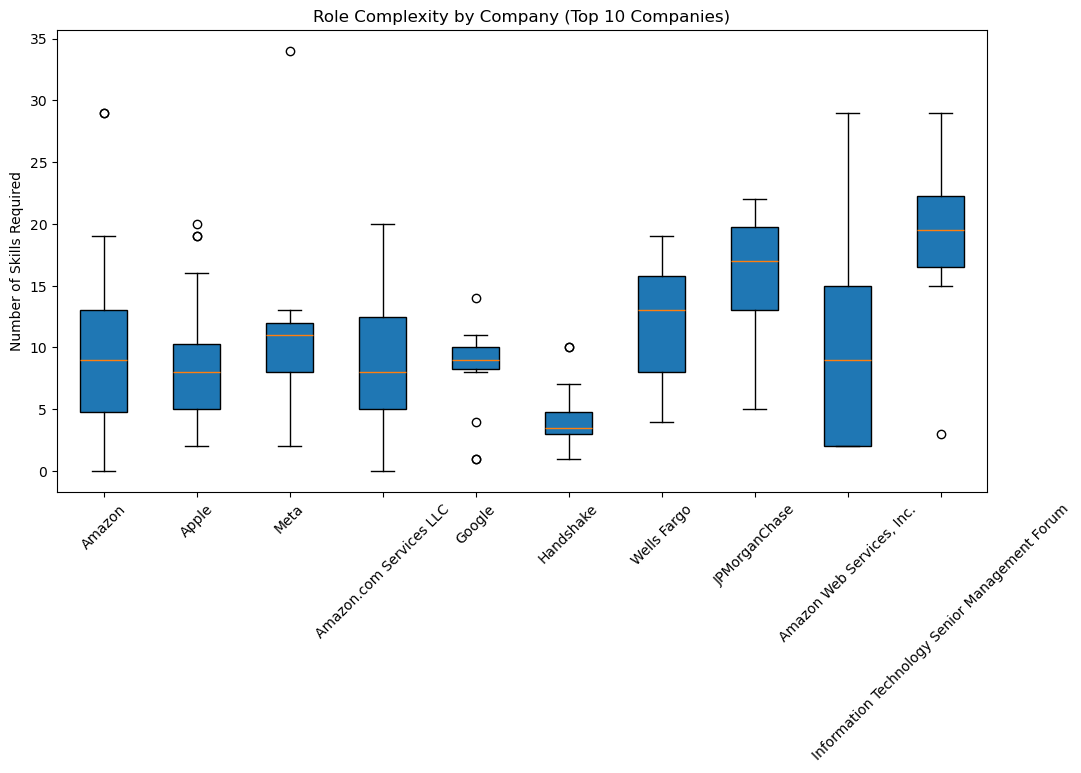

In [184]:
jobs_clean['total_skills'] = jobs_clean['skills_count_single'].apply(sum)


plt.figure(figsize=(10,5))
plt.hist(jobs_clean['total_skills'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Histogram of Role Complexity (Total Skills Required)')
plt.xlabel('Number of Skills Required')
plt.ylabel('Number of Roles')
plt.show()


top_roles = jobs_clean.sort_values(by='total_skills', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.barh(top_roles['positionName'], top_roles['total_skills'], color='skyblue', edgecolor='black')
plt.title('Top 10 Most Complex Roles (by Total Skills Required)')
plt.xlabel('Number of Skills')
plt.gca().invert_yaxis()
plt.show()


top_companies = jobs_clean['company'].value_counts().head(10).index
data_to_plot = [jobs_clean[jobs_clean['company'] == company]['total_skills'] for company in top_companies]

plt.figure(figsize=(12,6))
plt.boxplot(data_to_plot, labels=top_companies, patch_artist=True)
plt.title('Role Complexity by Company (Top 10 Companies)')
plt.ylabel('Number of Skills Required')
plt.xticks(rotation=45)
plt.show()


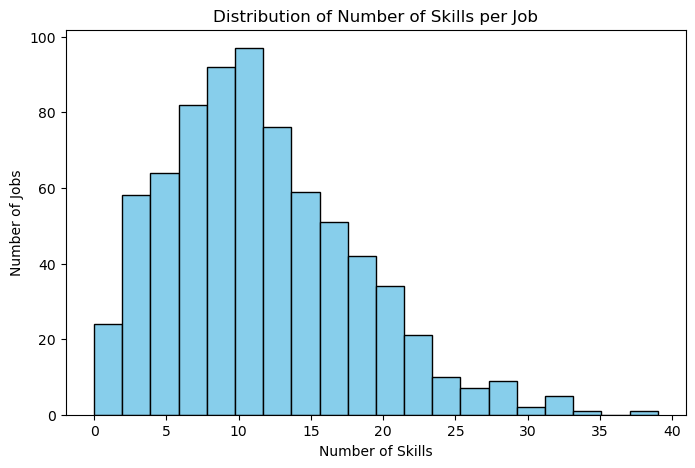

In [185]:
plt.figure(figsize=(8,5))
plt.hist(jobs_clean['skills_count_all'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Skills per Job')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Jobs')
plt.show()


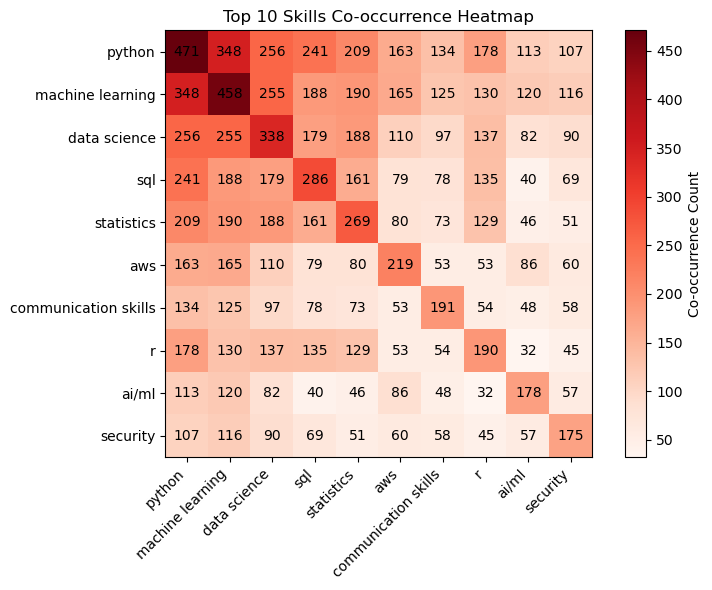

In [186]:
all_skills = [skill for sublist in jobs_clean['skills'] for skill in sublist]
top_skills = pd.Series(all_skills).value_counts().head(10).index.tolist()
co_occurrence = pd.DataFrame(0, index=top_skills, columns=top_skills)

for skills_list in jobs_clean['skills']:
    skills_set = set(skills_list) & set(top_skills)
    for skill1 in skills_set:
        for skill2 in skills_set:
            co_occurrence.loc[skill1,skill2]+=1

plt.figure(figsize=(8,6))
plt.imshow(co_occurrence,cmap='Reds',interpolation='nearest')
plt.colorbar(label='Co-occurrence Count')

for i in range(len(top_skills)):
    for j in range(len(top_skills)):
        plt.text(j,i,co_occurrence.iloc[i,j],ha='center',va='center',color='black')

plt.xticks(range(len(top_skills)),top_skills,rotation=45,ha='right')
plt.yticks(range(len(top_skills)),top_skills)
plt.title('Top 10 Skills Co-occurrence Heatmap')
plt.tight_layout()
plt.show()


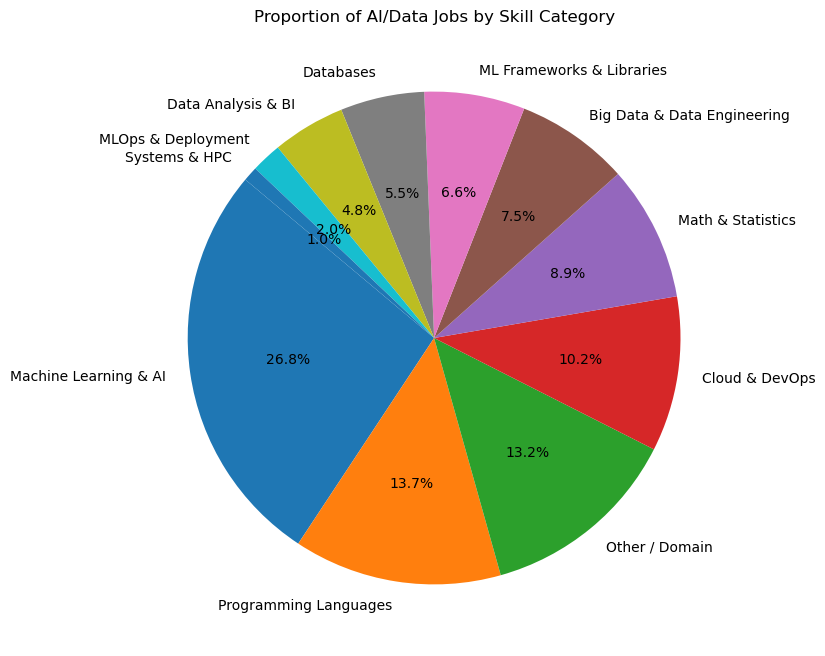

In [187]:
all_categories = [cat for sublist in jobs_clean['skill_categories'] for cat in sublist]

category_counts = pd.Series(all_categories).value_counts()

category_counts.index = category_counts.index.map(skills_dict)

plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of AI/Data Jobs by Skill Category')
plt.show()


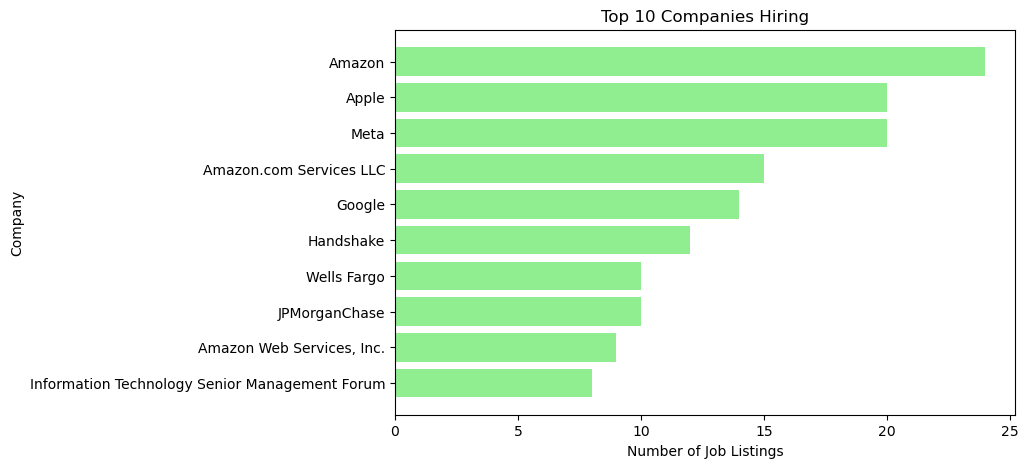

In [188]:
top_companies = jobs_clean['company'].value_counts().head(10)

plt.figure(figsize=(8,5))
plt.barh(top_companies.index[::-1], top_companies.values[::-1], color='lightgreen')
plt.xlabel('Number of Job Listings')
plt.ylabel('Company')
plt.title('Top 10 Companies Hiring')
plt.show()


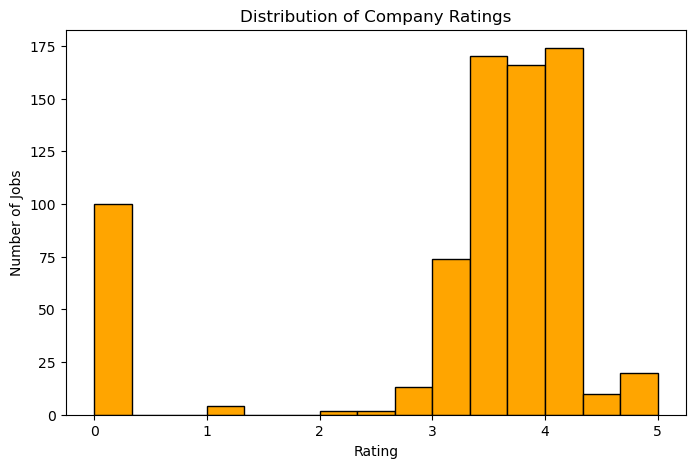

In [189]:
plt.figure(figsize=(8,5))
plt.hist(jobs_clean['rating'].dropna(), bins=15, color='orange', edgecolor='black')
plt.title('Distribution of Company Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Jobs')
plt.show()


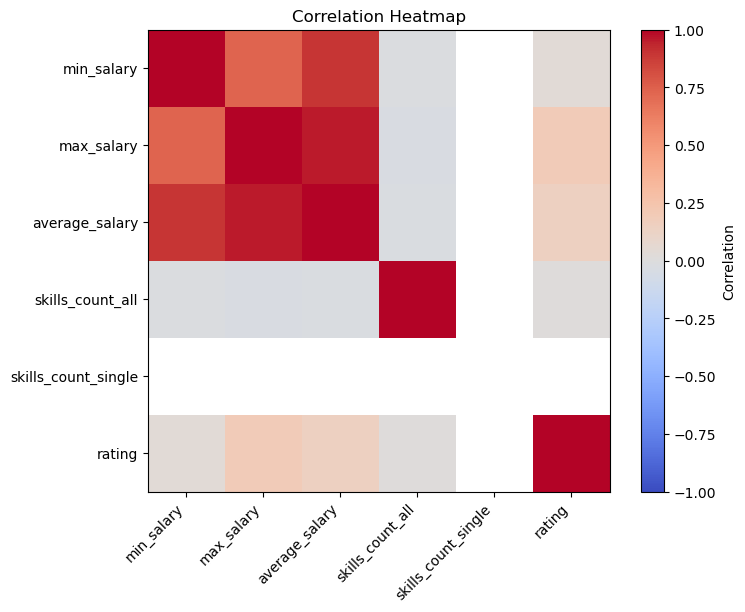

In [190]:
numeric_cols = ['min_salary', 'max_salary', 'average_salary', 'skills_count_all', 'skills_count_single', 'rating']

for col in numeric_cols:
    jobs_clean[col] = pd.to_numeric(jobs_clean[col], errors='coerce')

corr = jobs_clean[numeric_cols].corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha='right')
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title('Correlation Heatmap')
plt.show()


C:\Users\aryan\AppData\Local\Temp\ipykernel_24976\1393659967.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(salary_data, labels=top_companies, patch_artist=True)


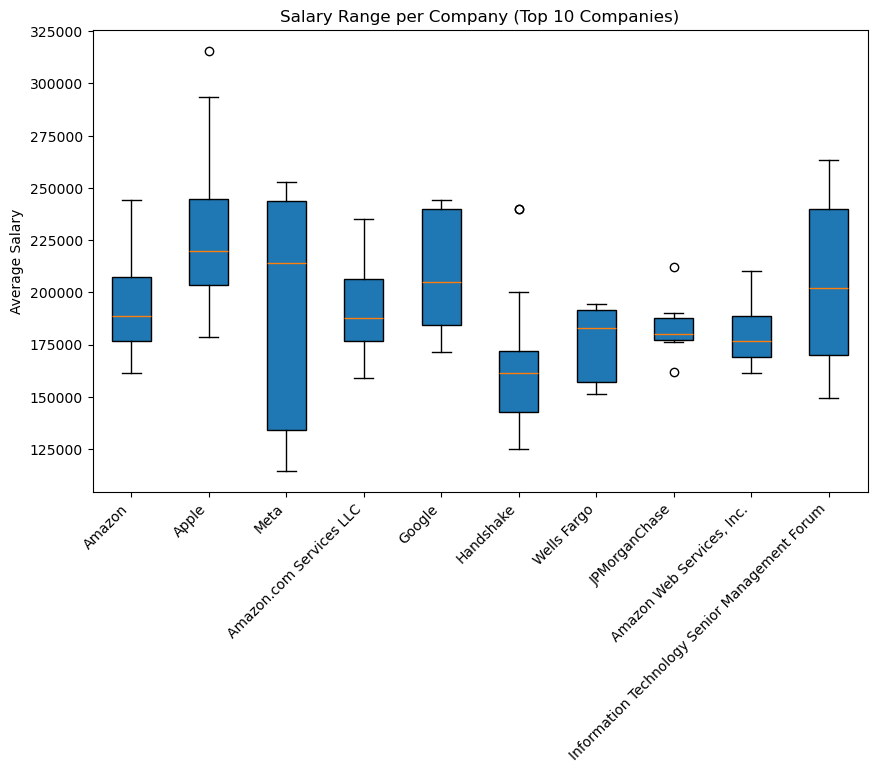

In [191]:
top_companies = jobs_clean['company'].value_counts().head(10).index

top_jobs = jobs_clean[jobs_clean['company'].isin(top_companies)]

salary_data = [top_jobs[top_jobs['company'] == company]['average_salary'].dropna() for company in top_companies]

plt.figure(figsize=(10,6))
plt.boxplot(salary_data, labels=top_companies, patch_artist=True)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Salary')
plt.title('Salary Range per Company (Top 10 Companies)')
plt.show()


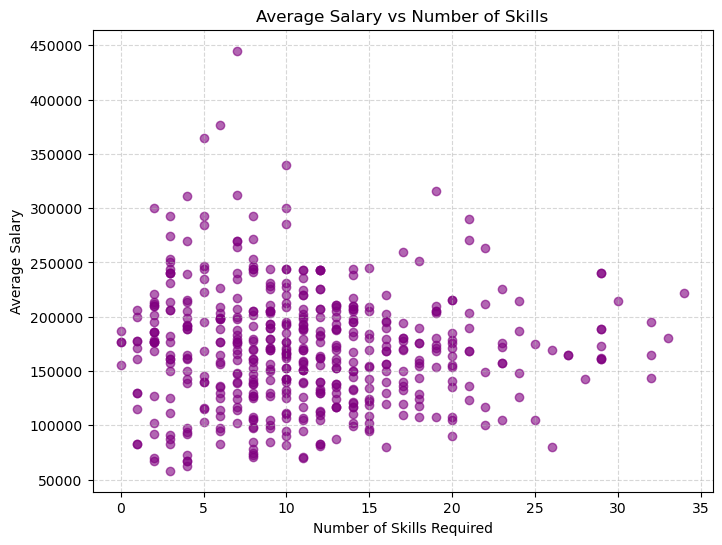

In [192]:
plt.figure(figsize=(8,6))
plt.scatter(jobs_clean['skills_count_all'], jobs_clean['average_salary'], alpha=0.6, color='purple')
plt.xlabel('Number of Skills Required')
plt.ylabel('Average Salary')
plt.title('Average Salary vs Number of Skills')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


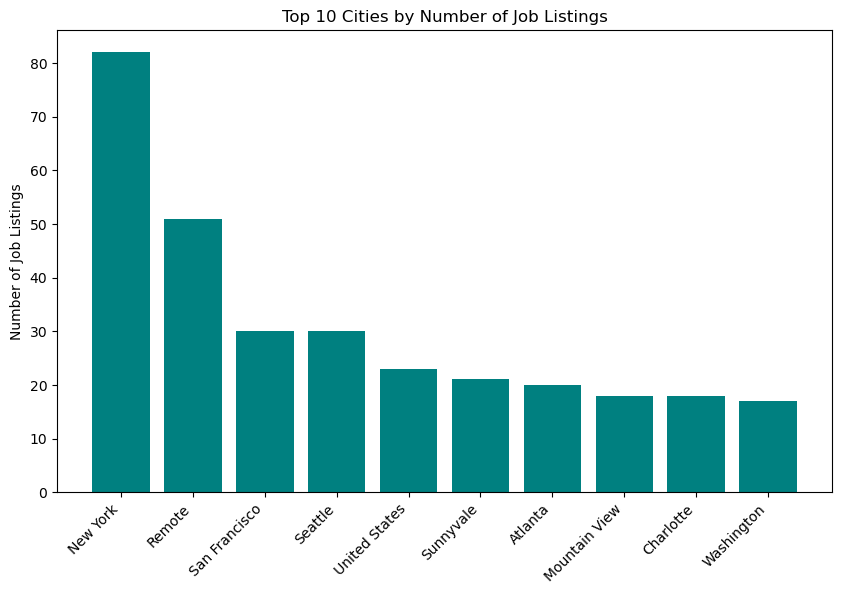

In [193]:
jobs_clean['city'] = jobs_clean['location'].apply(lambda x: str(x).split(',')[0])

top_cities = jobs_clean['city'].value_counts().head(10)

plt.figure(figsize=(10,6))
plt.bar(top_cities.index, top_cities.values, color='teal')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Job Listings')
plt.title('Top 10 Cities by Number of Job Listings')
plt.show()


positionName
Data Scientist                      45
Senior Data Scientist               15
Senior Data Analyst                 12
Principal Data Scientist             7
Lead Data Scientist                  7
Machine Learning Engineer            6
AI/ML Engineer                       6
Sr. Data Scientist                   6
Senior Machine Learning Engineer     5
AI Engineer                          5
Name: count, dtype: int64


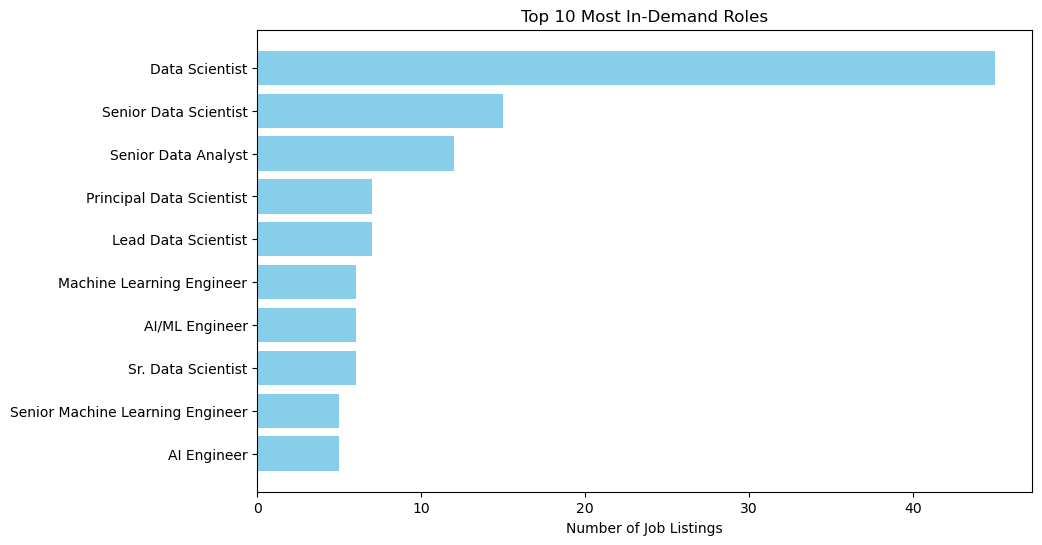

In [194]:
role_counts = jobs_clean['positionName'].value_counts()

top_roles = role_counts.head(10)
print(top_roles)
plt.figure(figsize=(10,6))
plt.barh(top_roles.index[::-1], top_roles.values[::-1], color='skyblue')
plt.xlabel('Number of Job Listings')
plt.title('Top 10 Most In-Demand Roles')
plt.show()


<h1 align="center">Modelling/Prediction</h1>

In [195]:
prompt="""
Im good at python, c, c++, javascript, streamlit and git, recommend me some jobs
"""

extract_skills(prompt,skill_categories,skills_dict)

['python', 'c', 'c++', 'javascript', 'streamlit', 'git'] 
 [0, 0, 0, 0, 3, 6]

python - Programming Languages
c - Programming Languages
c++ - Programming Languages
javascript - Programming Languages
streamlit - ML Frameworks & Libraries
git - Cloud & DevOps


Total Skills: 6

Programming Languages : 4
Math & Statistics : 0
Machine Learning & AI : 0
ML Frameworks & Libraries : 1
Big Data & Data Engineering : 0
Databases : 0
Cloud & DevOps : 1
Data Analysis & BI : 0
MLOps & Deployment : 0
Systems & HPC : 0
Other / Domain : 0


In [196]:
#decision tree classifier algorithm